In [1]:
path = r'M:\Documents\repos\PRESTUS_forked\data\transducer_profiles'

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## load the simulated transducer profile

In [5]:
pwd

'm:\\Documents\\repos\\PRESTUS_forked\\scripts\\tests'

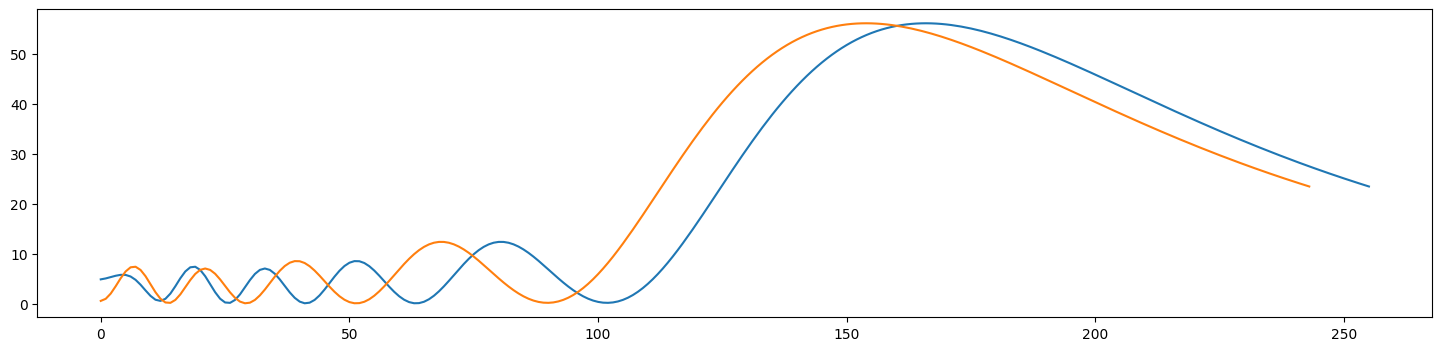

In [33]:
fname = "../../data/sims/sbj_3_duty_45_ntrl_400_amp_216000_targ_50-90-50_tpos_50-110-50_warp2_shallow_target/simulated_profile.csv"
data = pd.read_csv(fname, header=None).T
plt.figure(figsize=(18,4))
plt.plot(data[0].tolist())
plt.plot(data[0].tolist()[12:])
plt.show()

280 244


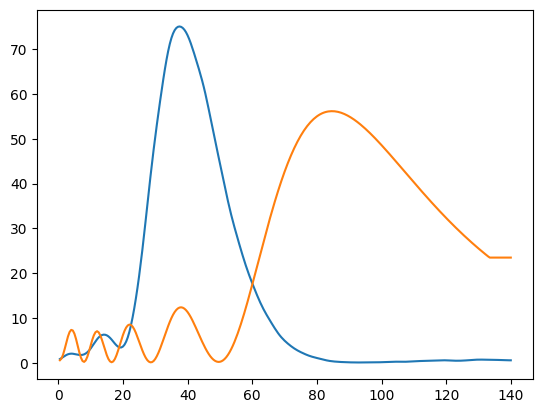

In [38]:
# align profile with x values of the available profiles
df_existing_profile = pd.read_csv(Path(path)/"Imasonic_test_ISPPA_50mm.csv", header=None, sep=";")

print(len(df_existing_profile), len(data) - 12)

# attempting to get rid of exit plance distance (? not sure that's what it is)
sim_data_no_exit_plane = data[0].tolist()[12:]

interp_data = np.interp(
    np.linspace(0, len(sim_data_no_exit_plane)-1, len(df_existing_profile)), 
    range(len(sim_data_no_exit_plane)), 
    sim_data_no_exit_plane
    )

plt.figure()
plt.plot(df_existing_profile[0], df_existing_profile[1])
plt.plot(df_existing_profile[0], interp_data)
plt.show()

# save as file
df_sim = df_existing_profile.copy()
df_sim[1] = interp_data
df_sim.to_csv('Imasonic_test_ISPPA_80mmmax_sim.csv', sep=";", index=None, header=None)

In [3]:
os.listdir(path)

['acoustic_profile_tutorial.csv',
 'CTX-250-001_27.3.csv',
 'CTX-250-001_49.7mm.csv',
 'CTX-250-001_64.5.csv',
 'CTX-250-001_64.5mm.csv',
 'CTX-250-011_64.5.csv',
 'CTX-500-024 4-Ch. Focal Steering - Verification 2 72.7.csv',
 'CTX-500-026 4-Ch. Focal Steering - Verification 3 73.5.csv',
 'CTX250-001-010_60.9mm.csv',
 'CTX500-024-010_77.0mm.csv',
 'CTX500-026-010_79.6mm.csv',
 'CTX_250-001_4chan_all_distances.csv',
 'CTX_250-011_4chan_all_distances.csv',
 'ctx_250_014_28mm.csv',
 'ctx_250_014_all.csv',
 'CTX_500-024_4-Ch._77.3mm.csv',
 'CTX_500-024_4-Ch._77.3mm.xlsx',
 'four_channel_example_49mm.csv',
 'four_channel_example_60mm.csv',
 'IMASONIC_IGT_300-15473_100.0mm.csv',
 'Imasonic_test_ISPPA_50mm.csv',
 'Imasonic_test_ISPPA_50mm_reversed.csv',
 'Imasonic_test_ISPPA_50mm_warped1.csv',
 'Imasonic_test_ISPPA_50mm_warped2.csv',
 'Imasonic_test_ISPPA_65mm.csv',
 'Imasonic_test_pressure_50mm.csv',
 'Imasonic_test_pressure_65mm.csv',
 'README.txt']

warped2 is the profile to use for now;  
just a bit weird that it is not at 100, even though PRESTUS results show it to be at 100  
maybe PRESTUS added exit plane distance or sth

[]

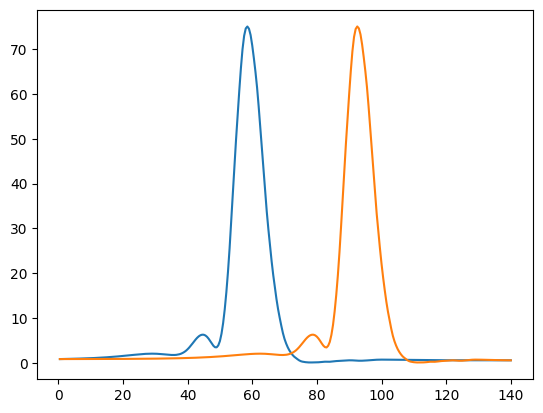

In [9]:
df_warped1 = pd.read_csv(Path(path)/"Imasonic_test_ISPPA_50mm_warped1.csv", header=None, sep=";")
df_warped2 = pd.read_csv(Path(path)/"Imasonic_test_ISPPA_50mm_warped2.csv", header=None, sep=";")
df_warped2 = pd.read_csv(Path(path)/"Imasonic_test_ISPPA_50mm_warped2.csv", header=None, sep=";")

plt.figure()
plt.plot(df_warped1[0], df_warped1[1])
plt.plot(df_warped2[0], df_warped2[1])
plt.plot()

In [6]:


df1 = pd.read_csv(Path(path)/"Imasonic_test_ISPPA_50mm.csv", header=None, sep=";")
df2 = pd.read_csv(Path(path)/"Imasonic_test_ISPPA_65mm.csv", header=None, sep=";")
df3 = pd.read_csv(Path(path)/"Imasonic_test_pressure_50mm.csv", header=None, sep=";")
df4 = pd.read_csv(Path(path)/"Imasonic_test_pressure_65mm.csv", header=None, sep=";")

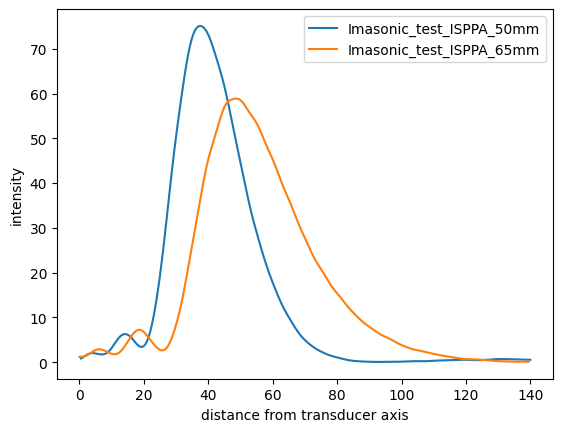

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df1[0], df1[1])
plt.plot(df2[0], df2[1])
# plt.plot(df3[1])
# plt.plot(df4[1])
plt.legend(["Imasonic_test_ISPPA_50mm", "Imasonic_test_ISPPA_65mm"])
plt.xlabel("distance from transducer axis")
plt.ylabel("intensity")
plt.show()

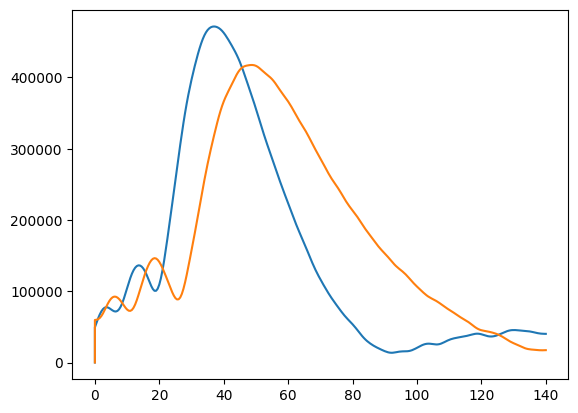

In [9]:
plt.figure()
# plt.plot(df1[1])
# plt.plot(df2[1])
plt.plot(df3[0], df3[1])
plt.plot(df4[0], df4[1])
plt.show()

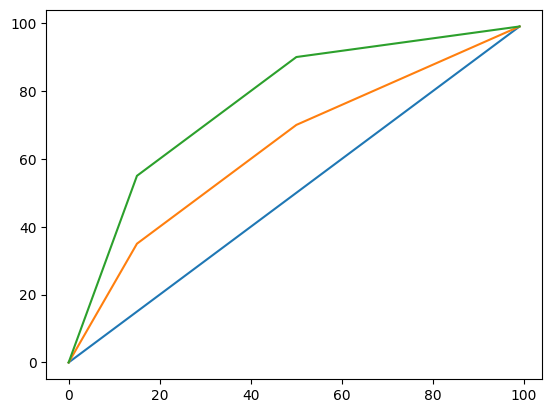

True
99 99.0


In [29]:
# test: shift the curve
# easiest: linear

# Sigmoid function to generate smooth indices
def smooth_indices(num_points, start=0, end=None, shift=0):
    if not end: end = num_points - 1
    x = np.linspace(-6, 6, num_points) + shift
    sigmoid = 1 / (1 + np.exp(-x))
    # Normalize sigmoid to ensure it starts at 'start' and ends at 'end'
    sigmoid_normalized = (sigmoid - sigmoid.min()) / (sigmoid.max() - sigmoid.min())
    return start + (end - start) * sigmoid_normalized

def smooth_indices2(num_points, start=0, end=None, shift=0):
    if not end:
        end = num_points - 1
    x = np.linspace(-6, 6, num_points) + shift
    sigmoid = 1 / (1 + np.exp(-x))
    inverted_sigmoid = sigmoid * (1 - sigmoid) * 4  # Creates a steep start and end, flatter middle
    # Normalize to ensure it starts at 'start' and ends at 'end'
    sigmoid_normalized = (inverted_sigmoid - inverted_sigmoid.min()) / (inverted_sigmoid.max() - inverted_sigmoid.min())
    return start + (end - start) * sigmoid_normalized

def logit_function(num_points, start=0, end=None, steepness=1, shift=0):
    if not end:
        end = num_points - 1
    
    # Generate x values from 0 to 1 for the logit function
    p = np.linspace(0.01, 0.99, num_points)  # Avoid 0 and 1 to prevent log(0)
    
    # Apply the logit function with steepness
    logit = np.log(p / (1 - p))
    
    # Normalize the logit function to the range [0, 1]
    logit_normalized = (logit - logit.min()) / (logit.max() - logit.min())
    
    # Apply steepness by scaling the normalized values
    logit_scaled = 1 / (1 + np.exp(-steepness * (logit_normalized - 0.5)))
    
    # Apply shift by rolling the array
    shift_idx = int(shift * num_points / 2)
    logit_shifted = np.roll(logit_scaled, shift_idx)
    
    # Normalize again to ensure it starts at 'start' and ends at 'end'
    logit_final = (logit_shifted - logit_shifted.min()) / (logit_shifted.max() - logit_shifted.min())
    
    return start + (end - start) * logit_final

def lego_function(num_points, start=0, end=None, latency=0):
    if not end: end = num_points - 1
    x_range = [0.15*num_points, 0.5*num_points]
    y_range = [x_range[0]+latency, x_range[1]+latency]
    x = [start, x_range[0], x_range[1], end]
    y = [start, y_range[0], y_range[1], end]
    x_ = np.linspace(start, end, num_points)
    return np.interp(x_, x, y)

plt.figure()
plt.plot(lego_function(100, latency=0))
plt.plot(lego_function(100, latency=20))
plt.plot(lego_function(100, latency=40))
plt.show()

print(sig1[0] == sig2[0] and sig1[-1] == sig2[-1])
print(default[-1], sig3[-1])

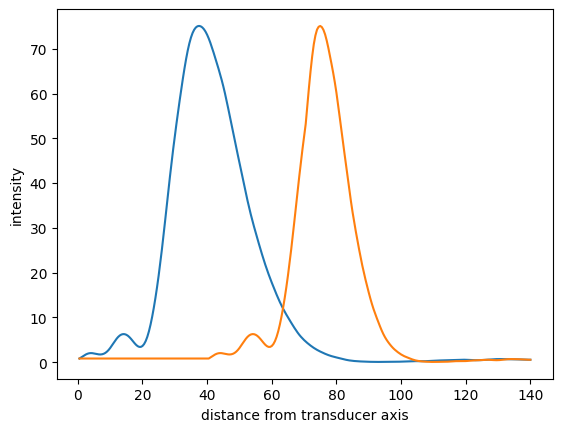

In [39]:
shifted_1     = np.interp(smooth_indices(len(df1[1])),            np.arange(len(df1[1])), df1[1])
shifted_left  = np.interp(smooth_indices(len(df1[1]), shift=3),   np.arange(len(df1[1])), df1[1])
shifted_right = np.interp(smooth_indices(len(df1[1]), shift=-3),  np.arange(len(df1[1])), df1[1])
lego_test     = np.interp(lego_function(len(df1[1]), latency=-80), np.arange(len(df1[1])), df1[1])

# TODO sanity check not passed: why negative latency/shift shifts curve to the right?

plt.figure()
plt.plot(df1[0], df1[1])
plt.plot(df1[0], lego_test)
plt.xlabel("distance from transducer axis")
plt.ylabel("intensity")
plt.show()

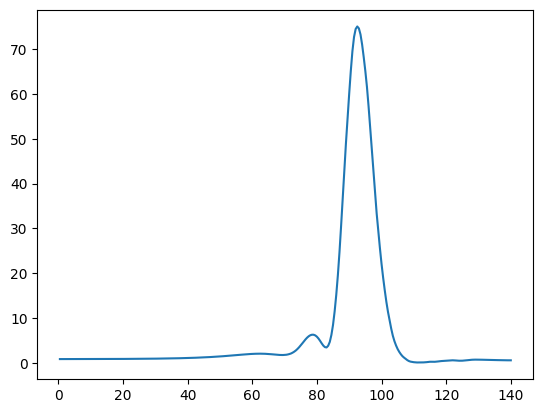

In [17]:
df1_warped1 = df1.copy()
df1_warped1[1] = np.interp(smooth_indices(len(df1[1]), shift=-3), np.arange(len(df1[1])), df1[1])
df1_warped1.to_csv('Imasonic_test_ISPPA_50mm_warped2.csv', sep=";", index=None, header=None)
plt.figure()
plt.plot(df1_warped1[0], df1_warped1[1])
plt.show()

In [1]:
os.listdir()

NameError: name 'os' is not defined

In [22]:
df1_reversed = df1.copy()

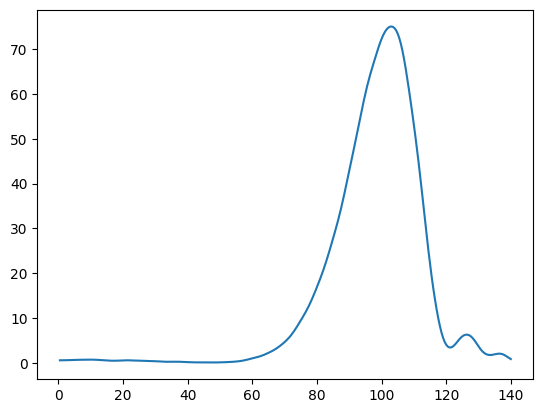

In [25]:
df1_reversed[1] = df1_reversed.iloc[::-1, 1].values
plt.figure()
plt.plot(df1_reversed[0], df1_reversed[1])
plt.show()

In [28]:
df1_reversed.to_csv('Imasonic_test_ISPPA_50mm_reversed.csv', sep=";", index=None)

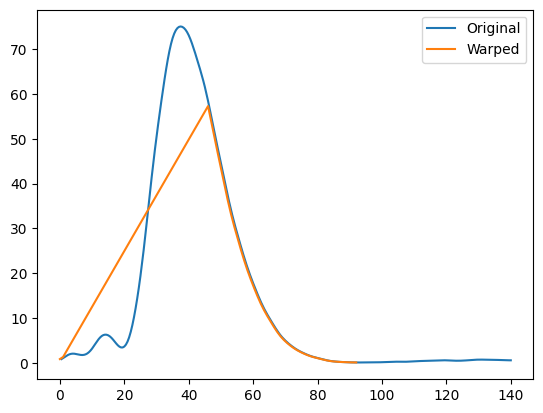

In [35]:
import numpy as np
import matplotlib.pyplot as plt

y = df1[1]
x = df1[0]

last_ind = df1[0].tolist()[-1]

# Define the target x values for the warp
target_x = np.linspace(0, last_ind, len(y))

# Warp the x values: move the first third to the center
warp_x = np.copy(target_x)
third = int(last_ind // 3)
warp_x[:third] = np.linspace(int(0.33*last_ind), int(0.66*last_ind), third)
warp_x[third:] = np.linspace(0, 1, len(y) - third)

# Sort warp_x to maintain a smooth transition
sorted_indices = np.argsort(warp_x)
warp_x = warp_x[sorted_indices]

# Interpolate the y values to the new x positions
warped_y = np.interp(warp_x, target_x, y)

# Plot the original and warped curves for visualization
plt.plot(x, y, label='Original')
plt.plot(warp_x, warped_y, label='Warped')
plt.legend()
plt.show()


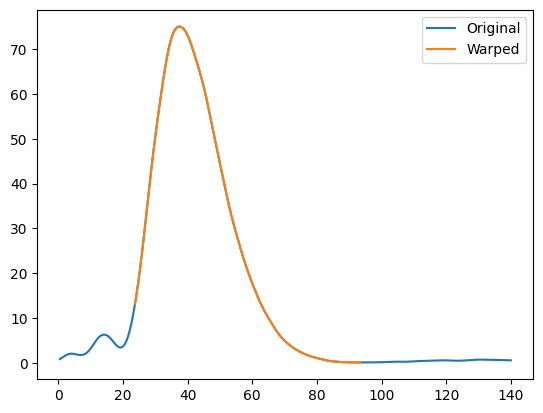

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Extract x and y values
x = df1.iloc[:, 0].values  # Assuming first column is x
y = df1.iloc[:, 1].values  # Assuming second column is y

# Convert x to a NumPy array if it is not already
x = np.array(x)

# Define the pivot point and the warp function
pivot = len(x) // 3  # Adjust the pivot as needed
warp_factor = 0.5  # Adjust the warp factor as needed

def warp_function(x, pivot, warp_factor):
    warped_x = np.copy(x)
    left_mask = x < x[pivot]
    right_mask = x >= x[pivot]
    
    left_stretch = np.linspace(x[0], x[pivot], np.sum(left_mask))
    right_squeeze = np.linspace(x[pivot], x[-1], np.sum(right_mask))

    warped_x[left_mask] = left_stretch * (1 - warp_factor) + x[pivot] * warp_factor
    warped_x[right_mask] = right_squeeze * (1 - warp_factor) + x[pivot] * warp_factor

    return warped_x

# Warp the x values
warp_x = warp_function(x, pivot, warp_factor)

# Interpolate the y values to the new x positions
warped_y = np.interp(warp_x, x, y)

# Plot the original and warped curves for visualization
plt.plot(x, y, label='Original')
plt.plot(warp_x, warped_y, label='Warped')
plt.legend()
plt.show()
